In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay, root_mean_squared_error, mean_squared_error

from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [1]:
import numpy
numpy.__version__

'1.26.4'

In [22]:
df_c19 = pd.read_csv("final_datasets/c19_final_2.csv")
df_m17 = pd.read_csv("final_datasets/m17_final_2.csv")
df_our = pd.read_csv("our_article.csv", sep=';')

In [23]:
df_our.drop(['science_field', 'collaborators', 'journal_name', 'title','abstract'], axis = 1, inplace= True, errors='ignore')
df_our[['rigor', 'novelty', 'accessibility']] = df_our[['rigor', 'novelty', 'accessibility']].astype('category')
enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
df_our['rigor'] = enc.fit_transform(df_our[['rigor']])
df_our['novelty'] = enc.fit_transform(df_our[['novelty']])
df_our['accessibility'] = enc.fit_transform(df_our[['accessibility']])

In [5]:
df_our

,title,abstract,rigor,novelty,grammar,replicability,accessibility,mathematics,computer_sciences,physical_sciences,...,exploratory_research,focus_groups,interviews,mixed_methods,observation,qualitative_research,quantitative_research,questionnaires,secondary_research,survey_methodology
0,LLM extraction of interpretable features from ...,None of the commonly used text representations...,high,high,0,1,low,0,1,0,...,1,0,0,1,1,1,1,0,0,0


### Train-test splitting

In [6]:
df_c19 = df_c19.sample(n=len(df_c19),random_state=42) 
df_m17 = df_m17.sample(n=len(df_m17), random_state=42)

In [7]:
def get_train_test(df):
    df.drop(['science_field', 'collaborators', 'journal_name', 'title','abstract'], axis = 1, inplace= True, errors='ignore')
    df_c19[['rigor', 'novelty', 'accessibility']] = df_c19[['rigor', 'novelty', 'accessibility']].astype('category')
    enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
    df['rigor'] = enc.fit_transform(df[['rigor']])
    df['novelty'] = enc.fit_transform(df[['novelty']])
    df['accessibility'] = enc.fit_transform(df[['accessibility']])
    if 'evaluation' in df.columns:
        y  = df['evaluation']
        X =  df.drop(['evaluation', 'eval_reduced'], axis=1, errors='ignore')
    else:
        y  = df['cited']
        X =  df.drop(['cited'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return  X_train, X_test, y_train, y_test

In [8]:
X_train_m17, X_test_m17, y_train_m17, y_test_m17 = get_train_test(df_m17)
X_train_c19, X_test_c19, y_train_c19, y_test_c19 = get_train_test(df_c19)

In [19]:
X_train_c19

,rigor,novelty,grammar,replicability,accessibility,mathematics,computer_sciences,physical_sciences,chemical_sciences,earth_and_related_sciences,...,exploratory_research,focus_groups,interviews,mixed_methods,observation,qualitative_research,quantitative_research,questionnaires,secondary_research,survey_methodology
545,2.0,2.0,0,1,2.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
624,2.0,2.0,0,1,2.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2739,1.0,0.0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2786,2.0,2.0,0,1,2.0,0.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,1,0,0,0,0
394,1.0,2.0,0,1,2.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619,1.0,2.0,0,1,2.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,0,1,0,0,0,1
2078,1.0,2.0,0,1,2.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
890,2.0,2.0,0,1,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,1,1,0,0,0
2517,2.0,2.0,0,1,2.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,1,0,0,0,0


In [9]:
def get_conf_matrix(y_test, y_pred):
    fig, _ = plt.subplots(nrows=1, figsize=(5,5))
    ax = plt.subplot(1, 1, 1)
    ax.grid(False)

    intensity = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = intensity, display_labels=set(y_test))
    _ = disp.plot(ax=ax)


In [33]:
dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_train_m17, y_train_m17)
y_pred = dummy.predict(X_test_m17)
display(f"Dummy Accuracy score: {accuracy_score(y_test_m17, y_pred)}")
display(f"Dummy Recall score: {recall_score(y_test_m17, y_pred, average='macro')}")
display(f"Dummy F1 score: {f1_score(y_test_m17, y_pred, average='macro')}")
display(f"Dummy Precision score: {precision_score(y_test_m17, y_pred, average='macro')}")
display(f"Dummy MAE score: {mean_absolute_error(y_test_m17, y_pred)}")
display(f"Dummy RMSE score: {root_mean_squared_error(y_test_m17, y_pred)}")
display(f"Dummy MSE score: {mean_squared_error(y_test_m17, y_pred)}")
get_conf_matrix(y_test_m17, y_pred)


NameError: name 'DummyClassifier' is not defined

In [34]:
dummy = DummyClassifier(strategy='uniform', random_state=42)
dummy.fit(X_train_c19, y_train_c19)
y_pred = dummy.predict(X_test_c19)
display(f"Dummy Accuracy score: {accuracy_score(y_test_c19, y_pred)}")
display(f"Dummy Recall score: {recall_score(y_test_c19, y_pred, average='macro')}")
display(f"Dummy F1 score: {f1_score(y_test_c19, y_pred, average='macro')}")
display(f"Dummy Precision score: {precision_score(y_test_c19, y_pred, average='macro')}")
display(f"Dummy MAE score: {mean_absolute_error(y_test_c19, y_pred)}")
display(f"Dummy RMSE score: {root_mean_squared_error(y_test_c19, y_pred)}")
display(f"Dummy MSE score: {mean_squared_error(y_test_c19, y_pred)}")
get_conf_matrix(y_test_c19, y_pred)


NameError: name 'DummyClassifier' is not defined

In [35]:
grid_rfc = {
 'max_depth': [10, 20, 30, 40, 45, 50],
 'max_features': ['log2', 'sqrt', 30],
 'min_samples_leaf': [30, 40, 50, 60, 70, 90],
 'min_samples_split': [20, 30, 50, 60, 90],
 'n_estimators': [ 100, 200, 400, 1000]}

grid_abc = {
    'n_estimators': [ 100, 200, 400, 1000],
    'learning_rate': [0.1, 0.2, 0.4, 1, 1.5]}

In [36]:

def train_rfc(X_train, y_train, X_test, y_test , metric = None):
    rf = RandomForestClassifier()
    rf_grid = RandomizedSearchCV(estimator = rf, param_distributions= grid_rfc, n_iter= 2000, cv = 5, verbose=3, n_jobs = -1, random_state=42)
    rf_grid.fit(X_train, y_train)
    best = rf_grid.best_estimator_
    y_pred = best.predict(X_test)
    display(f"Best params: {rf_grid.best_params_}")
    display(f"Random Forest Classifier Accuracy score: {accuracy_score(y_test, y_pred)}")
    display(f"Random Forest Classifier Recall score: {recall_score(y_test, y_pred, average='macro')}")
    display(f"Random Forest Classifier F1 score: {f1_score(y_test, y_pred, average='macro')}")
    display(f"Random Forest Classifier Precision score: {precision_score(y_test, y_pred, average='macro')}")
    display(f"Random Forest Classifier MAE score: {mean_absolute_error(y_test, y_pred)}")
    display(f"Random Forest Classifier RMSE score: {root_mean_squared_error(y_test, y_pred)}")
    display(f"Random Forest Classifier MSE score: {mean_squared_error(y_test, y_pred)}")
    get_conf_matrix(y_test, y_pred)

    result = permutation_importance(
        best, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
    forest_importances = forest_importances.sort_values(ascending=False)[:16]
    display(forest_importances)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

def train_gbc(X_train, y_train, X_test, y_test, metric = None):
    gbc = GradientBoostingClassifier()
    gbc_grid = RandomizedSearchCV(estimator = gbc, n_iter=2000 , param_distributions = grid_rfc, cv = 5, verbose=3, n_jobs = -1, scoring=metric, random_state=42)
    gbc_grid.fit(X_train, y_train)
    best = gbc_grid.best_estimator_

    y_pred = gbc_grid.predict(X_test)
    display(f"Best params: {gbc_grid.best_params_}")
    display(f"Gradient Boosting Classifier Accuracy score: {accuracy_score(y_test, y_pred)}")
    display(f"Gradient Boosting Classifier Recall score: {recall_score(y_test, y_pred, average='macro')}")
    display(f"Gradient Boosting Classifier F1 score: {f1_score(y_test,  y_pred, average='macro')}")
    display(f"Gradient Boosting Classifier Precision score: {precision_score(y_test, y_pred, average='macro')}")
    display(f"Gradient Boosting Classifier MAE score: {mean_absolute_error(y_test, y_pred)}")
    display(f"Gradient Boosting Classifier RMSE score: {root_mean_squared_error(y_test, y_pred)}")
    display(f"Gradient Boosting Classifier MSE score: {mean_squared_error(y_test, y_pred)}")
    get_conf_matrix(y_test, y_pred)


    result = permutation_importance(
        best, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
    forest_importances = forest_importances.sort_values(ascending=False)[:16]
    display(forest_importances)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

    # Compute SHAP values
    explainer = shap.Explainer(best, X_train)
    shap_values = explainer(X_test)

    # Plot SHAP summary plot
    shap.summary_plot(shap_values, X_test)

def train_abc(X_train, y_train, X_test, y_test, metric = None ):
    abc = AdaBoostClassifier()
    abc_grid = RandomizedSearchCV(estimator = abc, n_iter=2000 , param_distributions = grid_abc, cv = 5, verbose=3, n_jobs = -1, scoring=metric,random_state=42 )
    abc_grid.fit(X_train, y_train)
    best = abc_grid.best_estimator_

    y_pred = abc_grid.predict(X_test)
    display(f"Best params: {abc_grid.best_params_}")
    display(f"Ada Boosting Classifier Accuracy score: {accuracy_score(y_test, y_pred)}")
    display(f"Ada Boosting Classifier Recall score: {recall_score(y_test, y_pred, average='macro')}")
    display(f"Ada Boosting Classifier F1 score: {f1_score(y_test,  y_pred, average='macro')}")
    display(f"Ada Boosting Classifier Precision score: {precision_score(y_test, y_pred, average='macro')}")
    display(f"Ada Boosting Classifier MAE score: {mean_absolute_error(y_test, y_pred)}")
    display(f"Ada Boosting Classifier RMSE score: {root_mean_squared_error(y_test, y_pred)}")
    display(f"Ada Boosting Classifier MSE score: {mean_squared_error(y_test, y_pred)}")

    get_conf_matrix(y_test, y_pred)

    result = permutation_importance(
        best, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
    forest_importances = forest_importances.sort_values(ascending=False)[:16]
    display(forest_importances)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

def train_svm(X_train, y_train, X_test, y_test, metric = 'accuracy'):
    svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    display(f"SVM Accuracy score: {accuracy_score(y_test, y_pred)}")
    display(f"SVM Recall score: {recall_score(y_test, y_pred, average='macro')}")
    display(f"SVM F1 score: {f1_score(y_test, y_pred, average='macro')}")
    display(f"SVM Precision score: {precision_score(y_test, y_pred, average='macro')}")
    display(f"SVM MAE score: {mean_absolute_error(y_test, y_pred)}")
    display(f"SVM RMSE score: {root_mean_squared_error(y_test, y_pred)}")
    display(f"SVM MSE score: {mean_squared_error(y_test, y_pred)}")
    get_conf_matrix(y_test, y_pred)
    result = permutation_importance(
        svm, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
    forest_importances = forest_importances.sort_values(ascending=False)[:16]
    display(forest_importances)
    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

def train_logreg(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_orig = X_train
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    logistic_regression_cv_model = LogisticRegressionCV(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=10000,
        cv=5,
        random_state=42
    )
    logistic_regression_cv_model.fit(X_train, y_train)

    coefficients = logistic_regression_cv_model.coef_
    intercept = logistic_regression_cv_model.intercept_

    coefficients_df = pd.DataFrame(coefficients, columns=[col for col in X_train_orig.columns])
    coefficients_df['Intercept'] = intercept
    y_pred = logistic_regression_cv_model.predict(X_test)
    display(coefficients_df)
    display(f"Logreg Accuracy score: {accuracy_score(y_test, y_pred)}")
    display(f"Logreg Recall score: {recall_score(y_test, y_pred, average='macro')}")
    display(f"Logreg F1 score: {f1_score(y_test, y_pred, average='macro')}")
    display(f"Logreg Precision score: {precision_score(y_test, y_pred, average='macro')}")
    display(f"Logreg MAE score: {mean_absolute_error(y_test, y_pred)}")
    display(f"Logreg RMSE score: {root_mean_squared_error(y_test, y_pred)}")
    display(f"Logreg MSE score: {mean_squared_error(y_test, y_pred)}")
    get_conf_matrix(y_test, y_pred)

    result = permutation_importance(
        logistic_regression_cv_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=2
    )
    forest_importances = pd.Series(result.importances_mean, index=X_train_orig.columns)
    forest_importances = forest_importances.sort_values(ascending=False)[:16]
    display(forest_importances)
    
    fig, ax = plt.subplots()
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()


C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\linear_model\_logistic.py:1895: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,rigor,novelty,grammar,replicability,accessibility,mathematics,computer_sciences,physical_sciences,chemical_sciences,earth_and_related_sciences,...,focus_groups,interviews,mixed_methods,observation,qualitative_research,quantitative_research,questionnaires,secondary_research,survey_methodology,Intercept
0,0.043348,0.020036,-0.000695,0.000937,-0.011819,-0.001072,0.003976,0.013959,0.0225,0.016295,...,-0.011547,-0.004729,-0.001996,0.001293,-0.017806,-0.007455,-0.022684,0.007479,-0.009852,0.015432


'Logreg Accuracy score: 0.5733333333333334'

'Logreg Recall score: 0.5689268874496995'

'Logreg F1 score: 0.5681074332759726'

'Logreg Precision score: 0.5705887053505176'

'Logreg MAE score: 0.4266666666666667'

'Logreg RMSE score: 0.6531972647421809'

'Logreg MSE score: 0.4266666666666667'

basic_medicine                        0.009167
agriculture_forestry_and_fisheries    0.006833
law                                   0.004278
mechanical_engineering                0.003111
physical_sciences                     0.003056
veterinary_science                    0.003000
earth_and_related_sciences            0.002889
civil_engineering                     0.002833
industrial_biotechnology              0.002278
chemical_engineering                  0.002222
quantitative_research                 0.002056
questionnaires                        0.001722
experiment                            0.001556
social_and_economic_geography         0.001389
evironmental_biotechnology            0.001333
other_natural_sciences                0.001278
dtype: float64

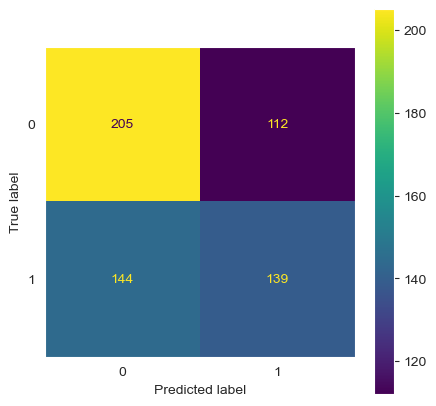

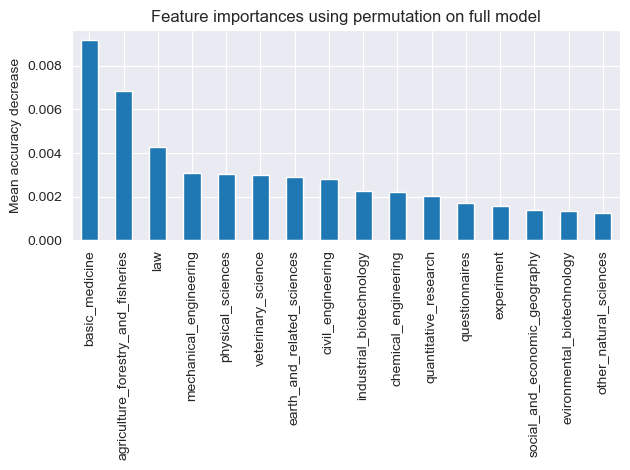

In [17]:
train_logreg(X_train_c19,y_train_c19, X_test_c19, y_test_c19)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


"Best params: {'n_estimators': 200, 'min_samples_split': 60, 'min_samples_leaf': 30, 'max_features': 30, 'max_depth': 10}"

'Random Forest Classifier Accuracy score: 0.5983333333333334'

'Random Forest Classifier Recall score: 0.5975131254807102'

'Random Forest Classifier F1 score: 0.5973927981757383'

'Random Forest Classifier Precision score: 0.5973557692307692'

'Random Forest Classifier MAE score: 0.40166666666666667'

'Random Forest Classifier RMSE score: 0.6337717780610514'

'Random Forest Classifier MSE score: 0.40166666666666667'

basic_medicine                0.023389
biological_sciences           0.013222
novelty                       0.011222
rigor                         0.009611
applied_research              0.008667
descriptive_research          0.005222
quantitative_research         0.005111
computer_sciences             0.005111
veterinary_science            0.004722
replicability                 0.004500
economics_and_business        0.002778
chemical_sciences             0.002722
secondary_research            0.002167
earth_and_related_sciences    0.002111
physical_sciences             0.001889
exploratory_research          0.001778
dtype: float64

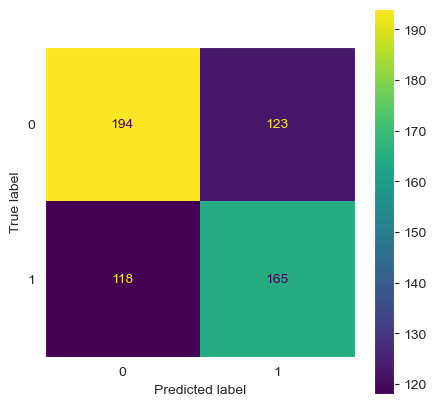

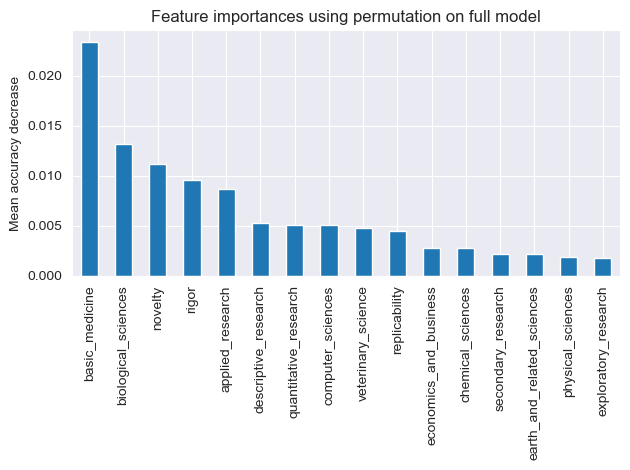

In [18]:
train_rfc(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19)

In [25]:
def train_gbc_shap(X_train, y_train, X_test, y_test, set):
    # Initialize the Gradient Boosting Classifier with specified parameters
    if set == 'c19':
        best = GradientBoostingClassifier( # C19
            n_estimators=100,
            min_samples_split=90,
            min_samples_leaf=90,
            max_features='log2',
            max_depth=50,
            random_state = 42
        )
    else: 
        best = GradientBoostingClassifier( #m17
            n_estimators =  100, 
            min_samples_split = 20, 
            min_samples_leaf=  70,
            max_features= 'log2', 
            max_depth= 20,
            random_state = 42
        )



# Train the model
    best.fit(X_train.sort_index(axis=1), y_train)

    # Predict on the test set
    y_pred = best.predict(df_our.drop(['title', 'abstract'], axis=1, errors='ignore').sort_index(axis=1))
    if set == 'c19':
        print(f"Predicted citation: {y_pred}")
    else:
        print(f"Predicted grade: {y_pred}")



In [27]:
train_gbc_shap(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19, set ='c19')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- computer_and_information_sciences
- earth_and_related_environmental_sciences
Feature names seen at fit time, yet now missing:
- computer_sciences
- earth_and_related_sciences


In [26]:
train_gbc_shap(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17, set = 'm17')

Predicted grade: [1]


Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


"Best params: {'n_estimators': 100, 'min_samples_split': 90, 'min_samples_leaf': 90, 'max_features': 'log2', 'max_depth': 50}"

'Gradient Boosting Classifier Accuracy score: 0.6133333333333333'

'Gradient Boosting Classifier Recall score: 0.6111402169187725'

'Gradient Boosting Classifier F1 score: 0.6112426828723356'

'Gradient Boosting Classifier Precision score: 0.611688006183419'

'Gradient Boosting Classifier MAE score: 0.38666666666666666'

'Gradient Boosting Classifier RMSE score: 0.621825270205921'

'Gradient Boosting Classifier MSE score: 0.38666666666666666'

biological_sciences           0.023889
novelty                       0.015944
basic_medicine                0.015889
rigor                         0.015611
electrical_engineering        0.013667
quantitative_research         0.013056
applied_research              0.012000
computer_sciences             0.009611
replicability                 0.009167
chemical_sciences             0.009056
animal_and_dairy_science      0.006611
earth_and_related_sciences    0.006556
veterinary_science            0.006500
physical_sciences             0.005611
sociology                     0.005556
education                     0.005556
dtype: float64

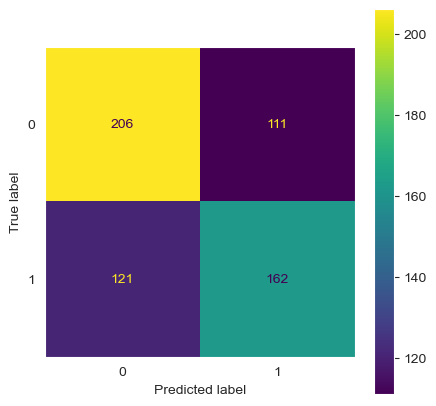

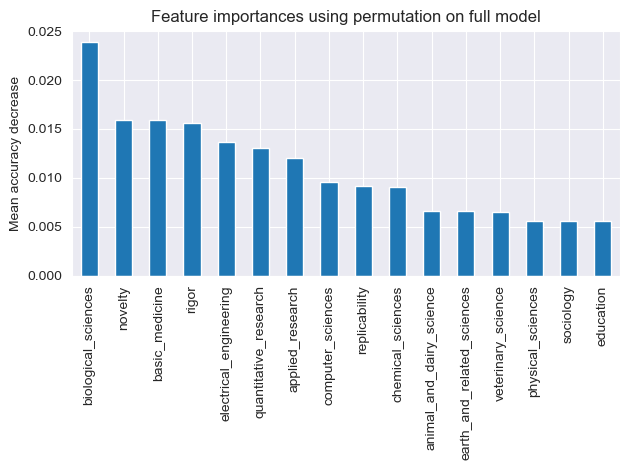

In the future `np.bool` will be defined as the corresponding NumPy scalar.


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [39]:
train_gbc(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


"Best params: {'n_estimators': 100, 'min_samples_split': 30, 'min_samples_leaf': 90, 'max_features': 'log2', 'max_depth': 50}"

'Gradient Boosting Classifier Accuracy score: 0.5983333333333334'

'Gradient Boosting Classifier Recall score: 0.5980816176388626'

'Gradient Boosting Classifier F1 score: 0.5977422378995803'

'Gradient Boosting Classifier Precision score: 0.5978057889822596'

'Gradient Boosting Classifier MAE score: 0.40166666666666667'

'Gradient Boosting Classifier RMSE score: 0.6337717780610514'

'Gradient Boosting Classifier MSE score: 0.40166666666666667'

basic_medicine                 0.019389
biological_sciences            0.017333
novelty                        0.017111
electrical_engineering         0.007500
mixed_methods                  0.006778
computer_sciences              0.006056
replicability                  0.005500
applied_research               0.005111
quantitative_research          0.004833
qualitative_research           0.004333
veterinary_science             0.004056
other_agricultural_sciences    0.001889
economics_and_business         0.001833
survey_methodology             0.001833
physical_sciences              0.001722
political_science              0.001556
dtype: float64

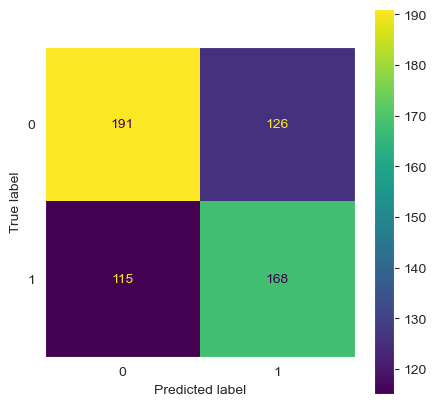

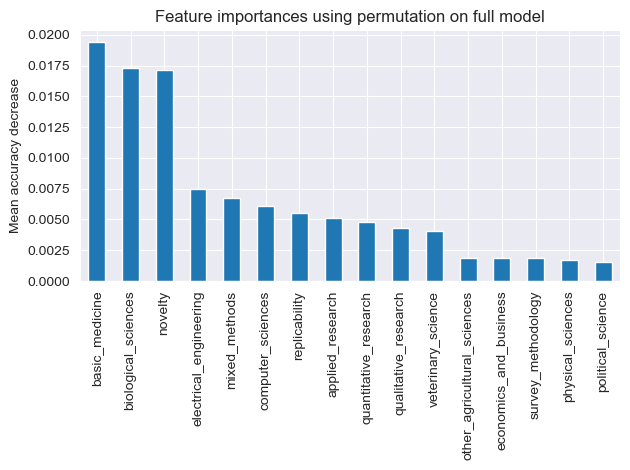

In [19]:
train_gbc(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19)

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=2000. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


"Best params: {'n_estimators': 200, 'learning_rate': 0.1}"

'Ada Boosting Classifier Accuracy score: 0.5783333333333334'

'Ada Boosting Classifier Recall score: 0.5780171885276053'

'Ada Boosting Classifier F1 score: 0.5777128057618'

'Ada Boosting Classifier Precision score: 0.5777977857809791'

'Ada Boosting Classifier MAE score: 0.4216666666666667'

'Ada Boosting Classifier RMSE score: 0.649358657959272'

'Ada Boosting Classifier MSE score: 0.4216666666666667'

basic_medicine                        0.033389
agriculture_forestry_and_fisheries    0.016056
biological_sciences                   0.015111
rigor                                 0.013667
animal_and_dairy_science              0.006056
quantitative_research                 0.003556
qualitative_research                  0.003333
descriptive_research                  0.002111
questionnaires                        0.002000
veterinary_science                    0.001722
sociology                             0.001722
economics_and_business                0.001389
accessibility                         0.000778
focus_groups                          0.000278
mixed_methods                         0.000000
law                                   0.000000
dtype: float64

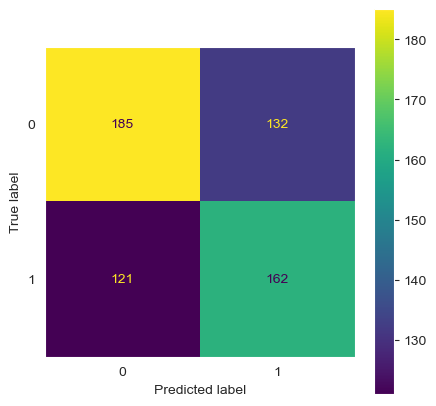

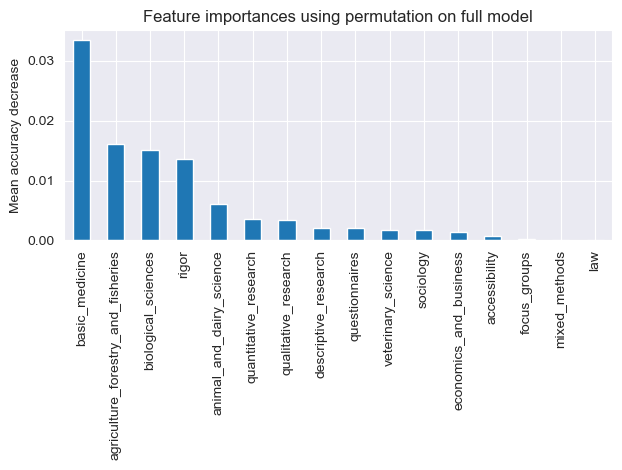

In [20]:
train_abc(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19)

'SVM Accuracy score: 0.5633333333333334'

'SVM Recall score: 0.5507462852938881'

'SVM F1 score: 0.5333871580547113'

'SVM Precision score: 0.5634273772204806'

'SVM MAE score: 0.43666666666666665'

'SVM RMSE score: 0.660807586719967'

'SVM MSE score: 0.43666666666666665'

basic_medicine                        0.010111
veterinary_science                    0.007556
chemical_sciences                     0.006722
biological_sciences                   0.006000
animal_and_dairy_science              0.005833
other_natural_sciences                0.005167
applied_research                      0.005056
clinical_medicine                     0.004056
psychology                            0.004000
mechanical_engineering                0.003778
agriculture_forestry_and_fisheries    0.003556
other_engineering_and_technologies    0.003444
descriptive_research                  0.003389
sociology                             0.003222
physical_sciences                     0.002500
earth_and_related_sciences            0.002167
dtype: float64

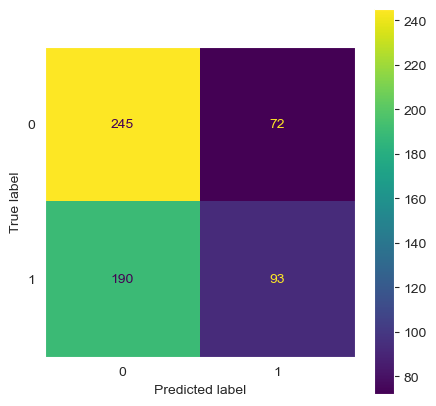

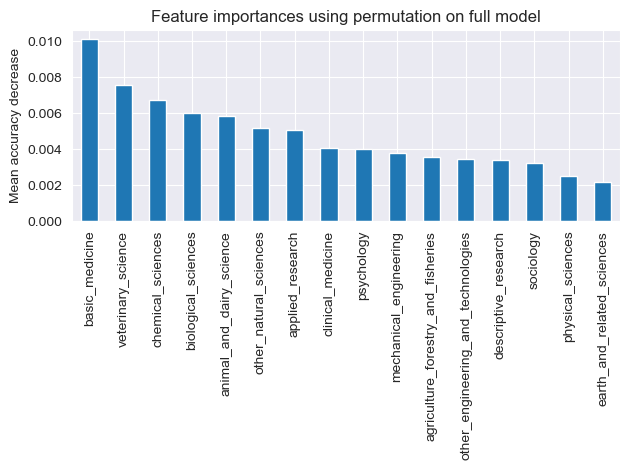

In [21]:
train_svm(X_train=X_train_c19, y_train=y_train_c19, X_test=X_test_c19, y_test=y_test_c19)

# M17+ dataset models
- unimodal, only generated features used
- Random Forest, Gradient Boost, Ada Boost, SVM

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


"Best params: {'n_estimators': 1000, 'min_samples_split': 90, 'min_samples_leaf': 30, 'max_features': 'sqrt', 'max_depth': 40}"

'Random Forest Classifier Accuracy score: 0.3525'

'Random Forest Classifier Recall score: 0.34998864275888397'

'Random Forest Classifier F1 score: 0.2636184467706207'

'Random Forest Classifier Precision score: 0.35426634789317907'

'Random Forest Classifier MAE score: 1.2925'

'Random Forest Classifier RMSE score: 1.8048545647780045'

'Random Forest Classifier MSE score: 3.2575'

replicability                        0.025750
rigor                                0.022583
biological_sciences                  0.008833
novelty                              0.006167
mechanical_engineering               0.005917
electrical_engineering               0.003667
chemical_engineering                 0.003667
applied_research                     0.003500
mixed_methods                        0.003167
computer_and_information_sciences    0.003000
industrial_biotechnology             0.002833
qualitative_research                 0.002833
other_social_sciences                0.002583
basic_medicine                       0.002000
sociology                            0.001250
medical_biotechnology                0.000917
dtype: float64

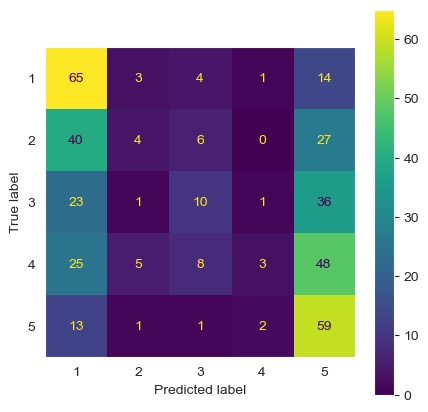

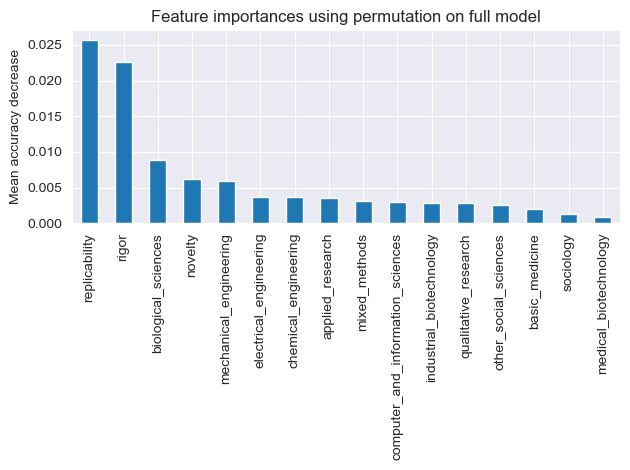

In [22]:
train_rfc(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


"Best params: {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 70, 'max_features': 'log2', 'max_depth': 20}"

'Gradient Boosting Classifier Accuracy score: 0.37'

'Gradient Boosting Classifier Recall score: 0.36596586514757423'

'Gradient Boosting Classifier F1 score: 0.3376502019694162'

'Gradient Boosting Classifier Precision score: 0.34675431008172897'

'Gradient Boosting Classifier MAE score: 1.1025'

'Gradient Boosting Classifier RMSE score: 1.5612494995995996'

'Gradient Boosting Classifier MSE score: 2.4375'

rigor                       0.045083
biological_sciences         0.027250
grammar                     0.024917
replicability               0.021000
novelty                     0.016250
other_natural_sciences      0.013083
other_social_sciences       0.012667
medical_biotechnology       0.011750
physical_sciences           0.011167
sociology                   0.010417
mixed_methods               0.009500
languages_and_literature    0.008500
civil_engineering           0.008083
qualitative_research        0.007833
education                   0.006833
chemical_engineering        0.005167
dtype: float64

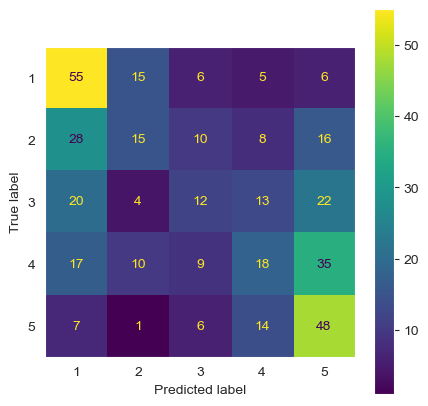

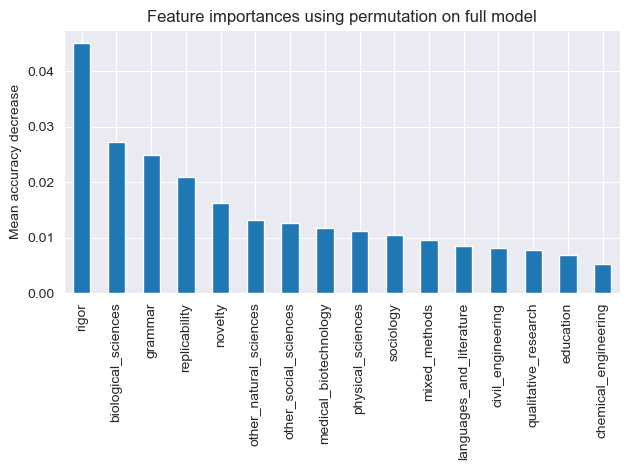

In [23]:
train_gbc(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17)

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 20 is smaller than n_iter=2000. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


"Best params: {'n_estimators': 100, 'learning_rate': 0.4}"

'Ada Boosting Classifier Accuracy score: 0.34'

'Ada Boosting Classifier Recall score: 0.3314942790084593'

'Ada Boosting Classifier F1 score: 0.3112476883785753'

'Ada Boosting Classifier Precision score: 0.31335500055500054'

'Ada Boosting Classifier MAE score: 1.0925'

'Ada Boosting Classifier RMSE score: 1.5321553446044562'

'Ada Boosting Classifier MSE score: 2.3475'

rigor                             0.041250
grammar                           0.016667
physical_sciences                 0.012000
industrial_biotechnology          0.010833
replicability                     0.009083
mathematics                       0.008917
philosophy_ethics_and_religion    0.008833
biological_sciences               0.007833
veterinary_science                0.006500
sociology                         0.006083
other_natural_sciences            0.005750
other_social_sciences             0.005583
economics_and_business            0.005583
medical_biotechnology             0.004750
clinical_medicine                 0.002917
qualitative_research              0.002000
dtype: float64

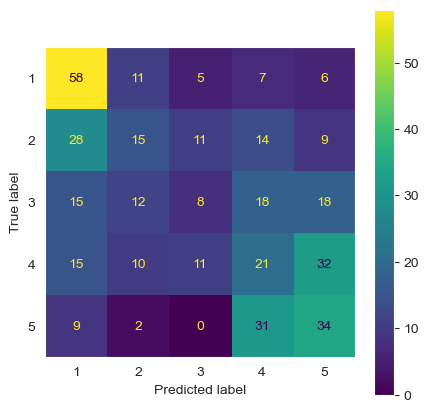

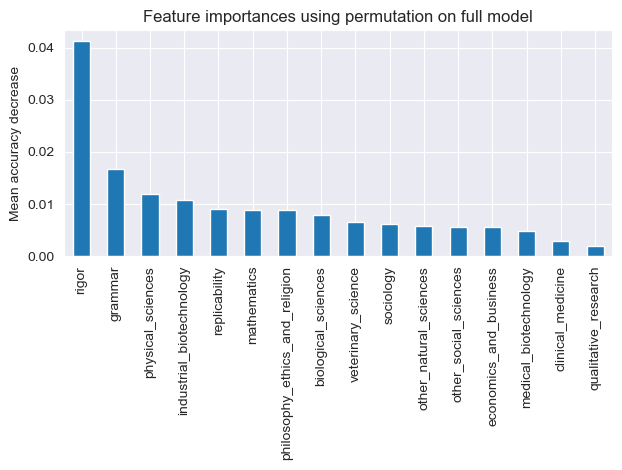

In [24]:
train_abc(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17)

C:\Users\vojta\Python\anaconda3\envs\ag\lib\site-packages\sklearn\linear_model\_logistic.py:1905: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,novelty,rigor,grammar,replicability,accessibility,mathematics,computer_and_information_sciences,physical_sciences,chemical_sciences,earth_and_related_environmental_sciences,...,focus_groups,interviews,mixed_methods,observation,qualitative_research,quantitative_research,questionnaires,secondary_research,survey_methodology,Intercept
0,0.126210,0.249042,-0.165094,0.120201,0.008417,0.083425,0.057825,0.113582,0.082028,-0.009616,...,-0.034277,-0.051540,0.044679,-0.016186,-0.036709,0.011611,-0.025779,-0.013486,0.015507,-0.126799
1,0.053225,0.105897,-0.052864,0.066332,-0.006086,0.036742,-0.007922,0.017211,0.004519,0.060439,...,-0.009462,0.026969,-0.020817,-0.046731,-0.040859,-0.034455,-0.059960,-0.008286,0.013872,0.100084
2,-0.093941,-0.005926,0.001202,0.041705,0.034332,0.007469,0.021474,-0.016008,0.011672,0.023520,...,-0.011792,0.018081,0.033854,-0.055710,0.048452,-0.030280,0.025496,0.009737,-0.000119,0.135289
3,-0.093926,-0.145434,0.086540,-0.046457,0.035742,-0.037246,-0.035931,-0.044326,-0.060109,-0.033442,...,-0.000645,-0.014814,-0.008940,0.079276,0.063484,-0.003893,-0.017939,-0.014994,-0.009598,0.007264
4,0.008432,-0.203580,0.130217,-0.181782,-0.072405,-0.090390,-0.035445,-0.070458,-0.038110,-0.040900,...,0.056177,0.021304,-0.048776,0.039350,-0.034368,0.057017,0.078182,0.027029,-0.019663,-0.115838


'Logreg Accuracy score: 0.37'

'Logreg Recall score: 0.36998749419112464'

'Logreg F1 score: 0.3249656191051208'

'Logreg Precision score: 0.3793722943722944'

'Logreg MAE score: 1.18'

'Logreg RMSE score: 1.6792855623746665'

'Logreg MSE score: 2.82'

rigor                                 0.054417
biological_sciences                   0.035667
novelty                               0.028667
replicability                         0.023917
grammar                               0.023833
physical_sciences                     0.022750
sociology                             0.019833
media_and_communications              0.019833
mathematics                           0.018667
mechanical_engineering                0.014667
applied_research                      0.014167
education                             0.012667
veterinary_science                    0.012167
other_medical_sciences                0.011917
economics_and_business                0.011333
other_engineering_and_technologies    0.011167
dtype: float64

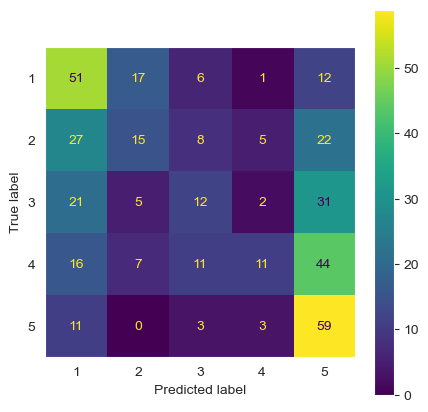

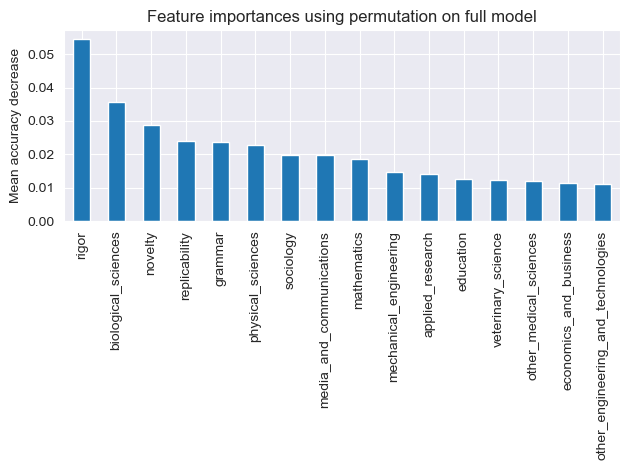

In [25]:
train_logreg(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17)

'SVM Accuracy score: 0.3375'

'SVM Recall score: 0.3346748511637251'

'SVM F1 score: 0.30718038836449313'

'SVM Precision score: 0.3152432721999748'

'SVM MAE score: 1.15'

'SVM RMSE score: 1.6046806535881213'

'SVM MSE score: 2.575'

rigor                       0.072000
biological_sciences         0.031667
replicability               0.027417
mechanical_engineering      0.010583
economics_and_business      0.009667
qualitative_research        0.009333
grammar                     0.009167
other_natural_sciences      0.009000
media_and_communications    0.008500
applied_research            0.008417
medical_biotechnology       0.007583
sociology                   0.006667
chemical_sciences           0.006500
physical_sciences           0.006333
other_social_sciences       0.003917
clinical_medicine           0.003833
dtype: float64

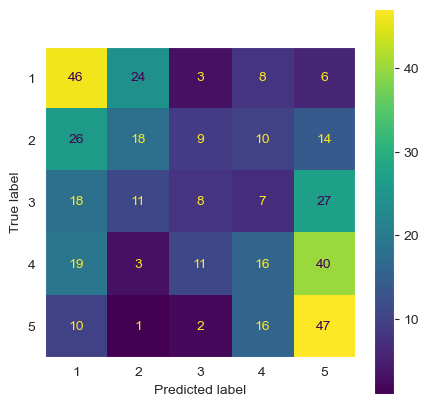

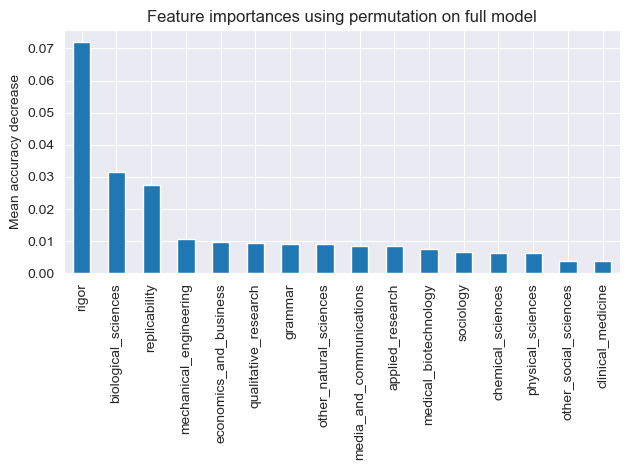

In [29]:
train_svm(X_train=X_train_m17, y_train=y_train_m17, X_test=X_test_m17, y_test=y_test_m17)